# IPv6 Prefix Size Analysis

## Introduction

This notebook helps us analyze the prefix size distribution in the IPv6 routing table. The expected input file format is a list of prefixes, one per line, in this way:

```
2001:278::/32
2001:288::/32
2001:290::/32
2001:290:4000::/36
2001:298::/32
2001:2A8::/32
2001:2B8::/32
2001:2B8:2::/48
2001:2B8:7::/48
2001:2B8:11::/48
```

Thie file should be named 'ipv6table.txt'.

In [1]:
%%bash
echo 'Add logic for automatically retrieve the routing table file'

Add logic for automatically retrieve the routing table file


## Retrieved files

In [43]:
%%bash
ls -l *txt

-rw-r--r-- 1 vagrant vagrant 679447 Sep 27 22:45 ipv6table.ris.txt
-rw-r--r-- 1 vagrant vagrant 374426 Sep 27 20:52 ipv6table.txt


## Analisys Script and Results

Processing routing table data: ipv6table.ris.txt
	lines: 25001
	avg  : 47.5702171913
 
Total prefixes in range (9, 64): 22795.0 (91.1763529459 pct)


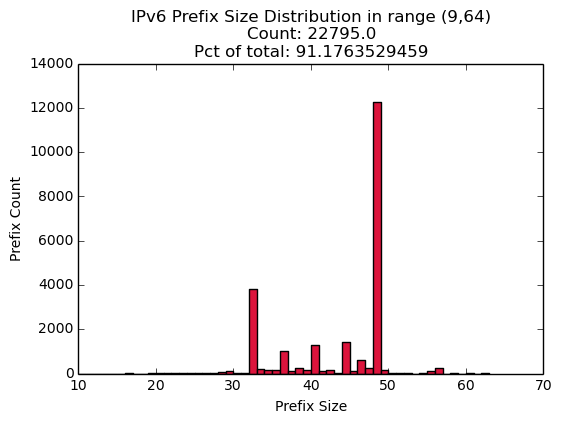

Processing routing table data: ipv6table.ris.txt
	lines: 25001
	avg  : 47.5702171913
 
Total prefixes in range (9, 31): 216.0 (0.863965441382 pct)


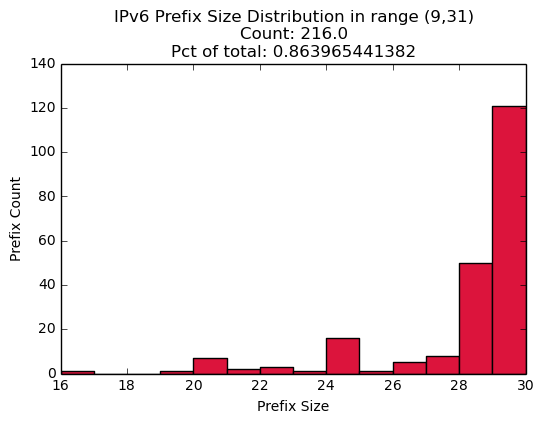

Processing routing table data: ipv6table.ris.txt
	lines: 25001
	avg  : 47.5702171913
 
Total prefixes in range (33, 47): 5737.0 (22.9470821167 pct)


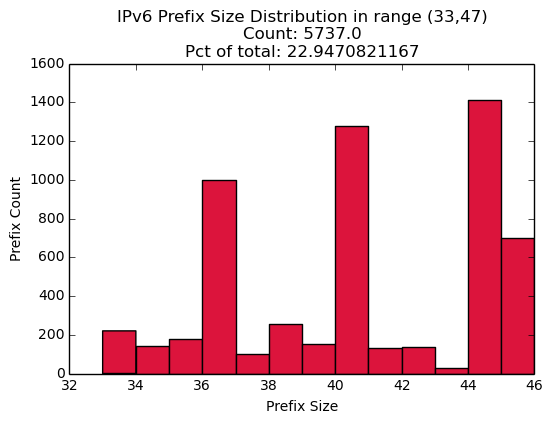

Processing routing table data: ipv6table.ris.txt
	lines: 25001
	avg  : 47.5702171913
 
Total prefixes in range (49, 64): 516.0 (2.0639174433 pct)


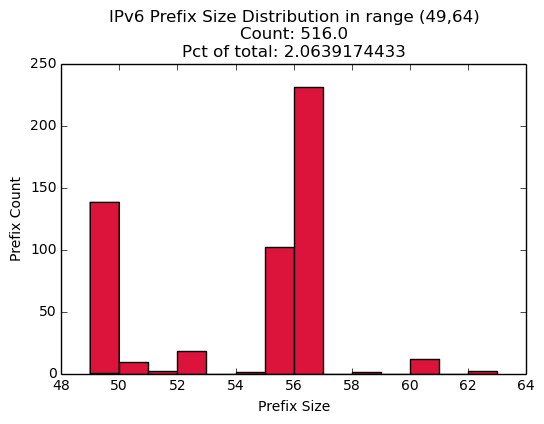

Processing routing table data: ipv6table.ris.txt
	lines: 25001
	avg  : 47.5702171913
 
Total prefixes in range (31, 33): 3842.0 (15.3673853046 pct)


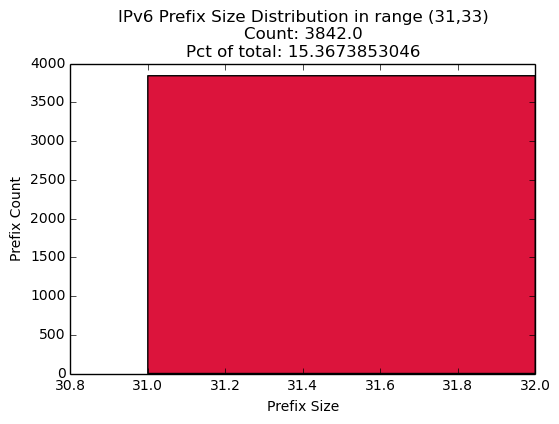

Processing routing table data: ipv6table.ris.txt
	lines: 25001
	avg  : 47.5702171913
 
Total prefixes in range (47, 49): 12484.0 (49.9340026399 pct)


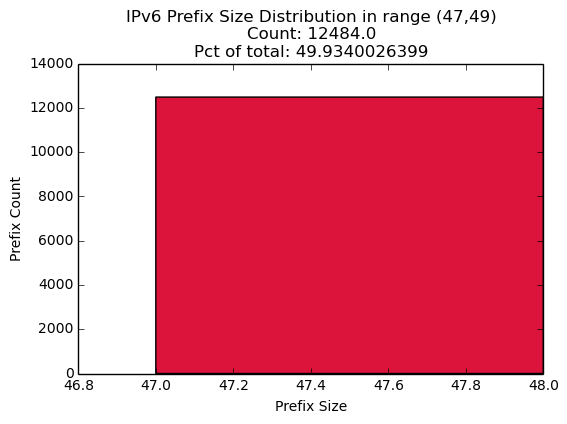

In [46]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
files = ['ipv6table.ris.txt']
ranges = [(9,64), (9,31), (33,47), (49,64), (31,33), (47,49)]

## begin
def load_pfx(f):
    f = open(f, "rb")
    rd = csv.reader(f, delimiter="/")
    i = 0
    pfx = []
    for line in rd:
        # print line[0], line[1]
        try:
            line = [x for x in line if x != '']
            pfx.append(int(line[1]))
        except:
            print "linea problematica [%s]" % (line)
            break
        # pfx_roa.append(5)
        i = i + 1
        if i>25000:
            break
        #
    f.close()
    # print "*** lines %s" % (i)
    return np.array(pfx)
## end get_pfx_roa+stats

for R in ranges:
    pr = load_pfx(files[0])
    print "=================================="
    print "Processing routing table data: %s" % (files[0])
    print "\tlines: %s" %(len(pr))
    print "\tavg  : %s" % (np.average(pr))
    print " "
    hist = plt.hist(pr, bins=range(R[0],R[1]), color=['crimson'])
    sum=0
    for x in range(0, len(hist[0])):
        # print(hist[1][x], hist[0][x])
        sum = sum + hist[0][x]
    print "Total prefixes in range %s: %s (%s pct)" % (R,sum,sum*100.0/len(pr))
    plt.title("IPv6 Prefix Size Distribution in range (%s,%s)\nCount: %s\nPct of total: %s" % (R[0], R[1], sum, sum*100.0/len(pr)) )
    plt.xlabel("Prefix Size")
    plt.ylabel("Prefix Count")
    plt.show()    
    print "=================================="
